# Exercice 3 - Stochastic Gradient learning in gardient descent
## de Charrin Théotime

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn
import sklearn 
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

### Q1 - Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it  

La descente de gradient stochastique est une approximation de la descente de gradient classique, où l'on essaie de minimiser la fonction de risque. La seule différence est qu'au lieu de calculer le gradient "réel", on l'approxime grâce aux échantillons observés.

On va supposer : 
$$ \exists J ~\text{différentiable},~\nabla J(\theta)=\mathbb{E}(g(\theta, X)),~\text{X de loi}~\mathbb{P}_X ~\text{connue et suivant }~ X^* $$

Notre étape de descente de gradient classique pour optimiser le paramètre $\theta$ donne ceci :
\begin{align} 
\theta^{k+1}&=\theta^k - \eta_{k+1}\nabla J(\theta^k) \\ 
&=\theta^k - \eta_{k+1} \mathbb{E}(g(\theta, X))
\end{align}
Avec $\eta_k$ le Learning Rate à l'étape k.
En descente de gradient stochastique, on va poser :
$$\mathbb{E}(g(\theta, X)) \approx \dfrac{1}{n} \sum_n g(\theta, X_k), X_k ~\text{n copies iid de X} $$

Ainsi, si l'on fait des pas suffisamment petits, on peut poser :
$$ \theta^{k+1}=\theta^k - \dfrac{c}{n}\sum_n g(\theta, X_{k+1})$$

Ici, on veut minimiser le risque sur l'ensemble des w, dans l'implémentation stochastique on introduit donc le risque empirique que l'on veut minimiser :
$$ \min_w R_n(w)=\min_w \dfrac{1}{n}\sum_n (y_i - w^tx_i)^2$$

Le pseudo-algorithme est donc le suivant :
> - On part d'un vecteur aléatoire $w_0 \in \mathbb{R}^d$
> - pour $k=( 0,1,\dots,~\text{fin}~=n_{iter} )$:
> > - on choisit un learning rate $(\epsilon_k)_{k\geq0}$ > 0 et un $i\in \mathbb{N}$ aléatoire (MC)
> > - On calcule $\nabla_w j(w^k,z_i)$
> > - \begin{align} w_{k+1}&=w_k-\epsilon_k \nabla R_n(w_{k}) \\ &= w_k - \epsilon_k \mathbb{E}( \nabla_w j(w_{k},z_i))
\\ &= w_k - \epsilon_k \nabla_w (y_i - w_{k}^tx_i)^2
\\ &= w_k + 2 \epsilon_k (y_i - w_{k}^t x_i)x_i
\end{align}

En pratique, on prendre un $(\epsilon_k)_{k\geq0}$ tel que $\lim_{+\infty} \epsilon_k = 0$ mais pas trop vite, $\textit{i.e.}$ $\sum_{+\infty}\epsilon_k=+\infty$. On prendra souvent $$\epsilon_k = \dfrac{1}{k^{\alpha}},~\alpha \in [0.1,1]$$

In [16]:
def stochastic_gd(x,y, w_0,alpha, niter):
    w_old=w_0
    k=0
    for k in range(1,niter+1):
        i=np.random.randint(0, x.shape[0])
        w_new=w_old+ (2./(k**alpha)) * (y[i] - x[i,:].dot(w_old))*x[i,:]
        w_old=w_new
        #On normalise le vecteur normal
    return w_new/np.sqrt(w_new.dot(w_new))

In [17]:
def sample(n,w):
    x=np.random.rand(n,2)
    a=np.dot(x,w)
    a[a>0]=1
    a[a<0]=-1
    return x, a

w=np.array([1,-1])
#On normalise pour comparer les distances
w=w/np.sqrt(w.dot(w))
n=10000
x,y=sample(n,w)
print(x.shape)

(10000, 2)


In [18]:
alpha=0.8
w_est=stochastic_gd(x,y,w,alpha,10000)
print(w_est)
y_est=x.dot(w_est)
y_est[y_est>0]=1
y_est[y_est<0]=-1
dist=np.linalg.norm(w_est-w)
print(f"La distance entre les deux vecteurs est de {dist}")

[ 0.71143795 -0.70274891]
La distance entre les deux vecteurs est de 0.006144108403369974


Le vecteur estimé est toujours très proche de w*, mais jamais égal.

Text(0.5, 1.0, 'Erreurs')

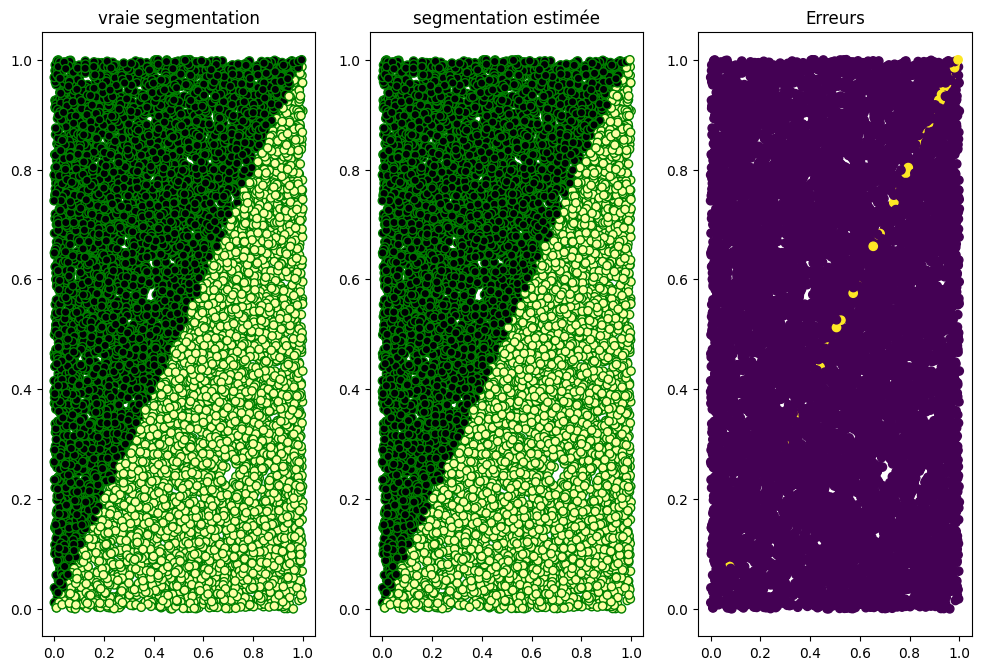

In [19]:
ax1=plt.subplot(131)
ax1.scatter(x[:,0],x[:,1],c=y,cmap='inferno',facecolors='none',edgecolors='g')
ax1.set_title("vraie segmentation")
ax2=plt.subplot(132)
ax2.scatter(x[:,0],x[:,1],c=y_est,cmap='inferno',facecolors='none',edgecolors='g')
ax2.set_title("segmentation estimée")
y_diff=y_est-y
ax3=plt.subplot(133)
ax3.scatter(x[:,0],x[:,1],c=y_diff)
ax3.set_title("Erreurs")

In [7]:
n=10000
noise=np.random.normal(loc=0,scale=0.125,size=(n,2))
#Comment estimer l'écart-type de la normale? On veut que 95% du bruit soit entre -0.25 et 0.25 environ (25% de la variance) 
#donc on prend loc=0.125
w_0=np.array([4,-1])
w_0=w_0/np.sqrt(w_0.dot(w_0))
x,y=sample(n,w_0)
x_noised=x+noise
w_est=stochastic_gd(x,y,w_0,alpha,10000)
y_est=x.dot(w_est)
y_est[y_est>0]=1
y_est[y_est<0]=-1
w_noised=stochastic_gd(x_noised,y,w_0,alpha,10000)
y_noised=x.dot(w_noised)
y_noised[y_noised>0]=1
y_noised[y_noised<0]=-1
print(f"La valeur estimée sans bruit est : {w_est}\n Alors que l'estimation avec bruit est (learning rate alpha de {alpha} ): {w_noised}) ")
dist=np.linalg.norm(w_est-w_noised)
print(f"La distance entre les deux vecteurs (bruité versus non bruité) est de {dist}")
dist_t=np.linalg.norm(w_noised-w_0)
print(f"La distance entre les deux vecteurs (bruité versus vrai) est de {dist_t}")

La valeur estimée sans bruit est : [ 0.99492099 -0.10065893]
 Alors que l'estimation avec bruit est (learning rate alpha de 0.8 ): [ 0.99996443 -0.00843491]) 
La distance entre les deux vecteurs (bruité versus non bruité) est de 0.09236182163844064
La distance entre les deux vecteurs (bruité versus vrai) est de 0.23599256604190316


Text(0.5, 1.0, 'bruit')

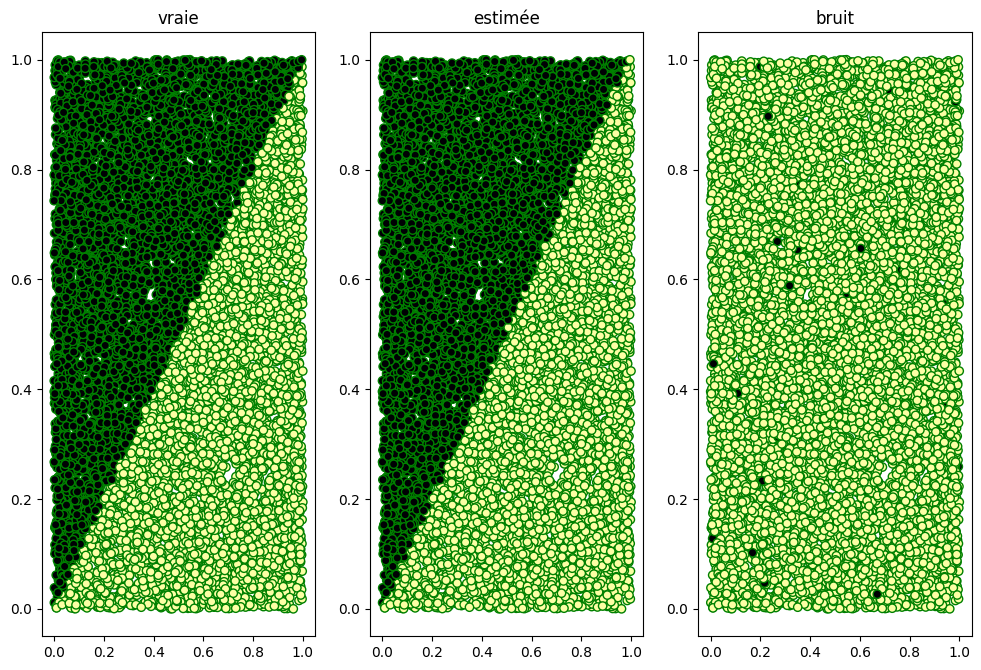

In [20]:
ax3=plt.subplot(131)
ax3.scatter(x[:,0],x[:,1],c=y,cmap='inferno',facecolors='none',edgecolors='g')
ax3.set_title("vraie")
ax1=plt.subplot(132)
ax1.scatter(x[:,0],x[:,1],c=y_est,cmap='inferno',facecolors='none',edgecolors='g')
ax1.set_title("estimée")
ax2=plt.subplot(133)
ax2.scatter(x[:,0],x[:,1],c=y_noised,cmap='inferno',facecolors='none',edgecolors='g')
ax2.set_title("bruit")

In [9]:
data=pd.read_csv('./data/breast-cancer-wisconsin.data', delimiter=",", index_col=False, header=None).replace("?", np.nan).dropna()
print(data.shape)
column_names=["id"]+["x%d" %i for i in range(1,10)]+["class"]
data.columns=column_names
data.index=data.iloc[:,0]
data=data.iloc[:,1:]
data

(683, 11)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


In [10]:
x=data.iloc[:,0:-1]
y=np.where(data["class"]==2,1,-1)
#y=1 veut dire cancer bénin
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
scaler = Normalizer().fit(x_train)
normalized_x_train= scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)
normalized_x_train.shape

(512, 9)

Text(0.5, 1.0, 'Matrice de confusion, le score de précision est de 87.7%')

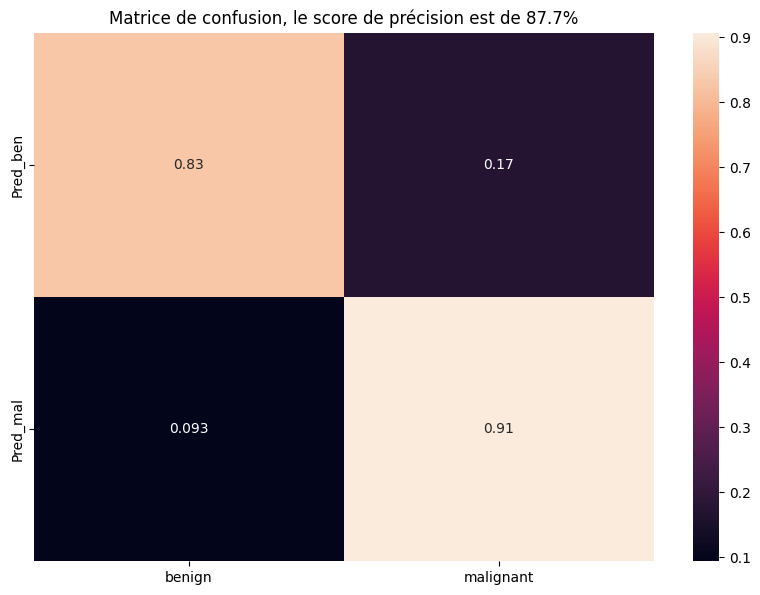

In [21]:
w_0=np.random.rand(normalized_x_train.shape[1])
w_0=w_0/(np.sqrt(w_0.dot(w_0)))
w_est=stochastic_gd(normalized_x_train,y_train,w_0,alpha=0.8,niter=100000)


### Confusion matrix
y_pred=np.where(normalized_x_test.dot(w_est)>0,1,-1)
accuracy_score=sklearn.metrics.accuracy_score(y_test,y_pred,normalize=True)
cm=sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')
df_cm = pd.DataFrame(cm, columns = ["benign", "malignant"],
                  index = ["Pred_ben", "Pred_mal"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.title(f"Matrice de confusion, le score de précision est de {accuracy_score*100:.1f}%")